In [1]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import flopy
from flopy.utils import HeadFile, CellBudgetFile
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
from faspy.plot import ModelBaseMap, plot_basemap
from faspy import utils
from faspy import Grid
import sys
sys.path.append('..')
from FASModel import *

x_coords, y_coords = proj_x, proj_y

ml = flopy.modflow.Modflow.load('fas.nam', model_ws=os.path.relpath(modelpath), load_only=['dis', 'bas6'], check=False)

C:\Anaconda\lib\site-packages\matplotlib\collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


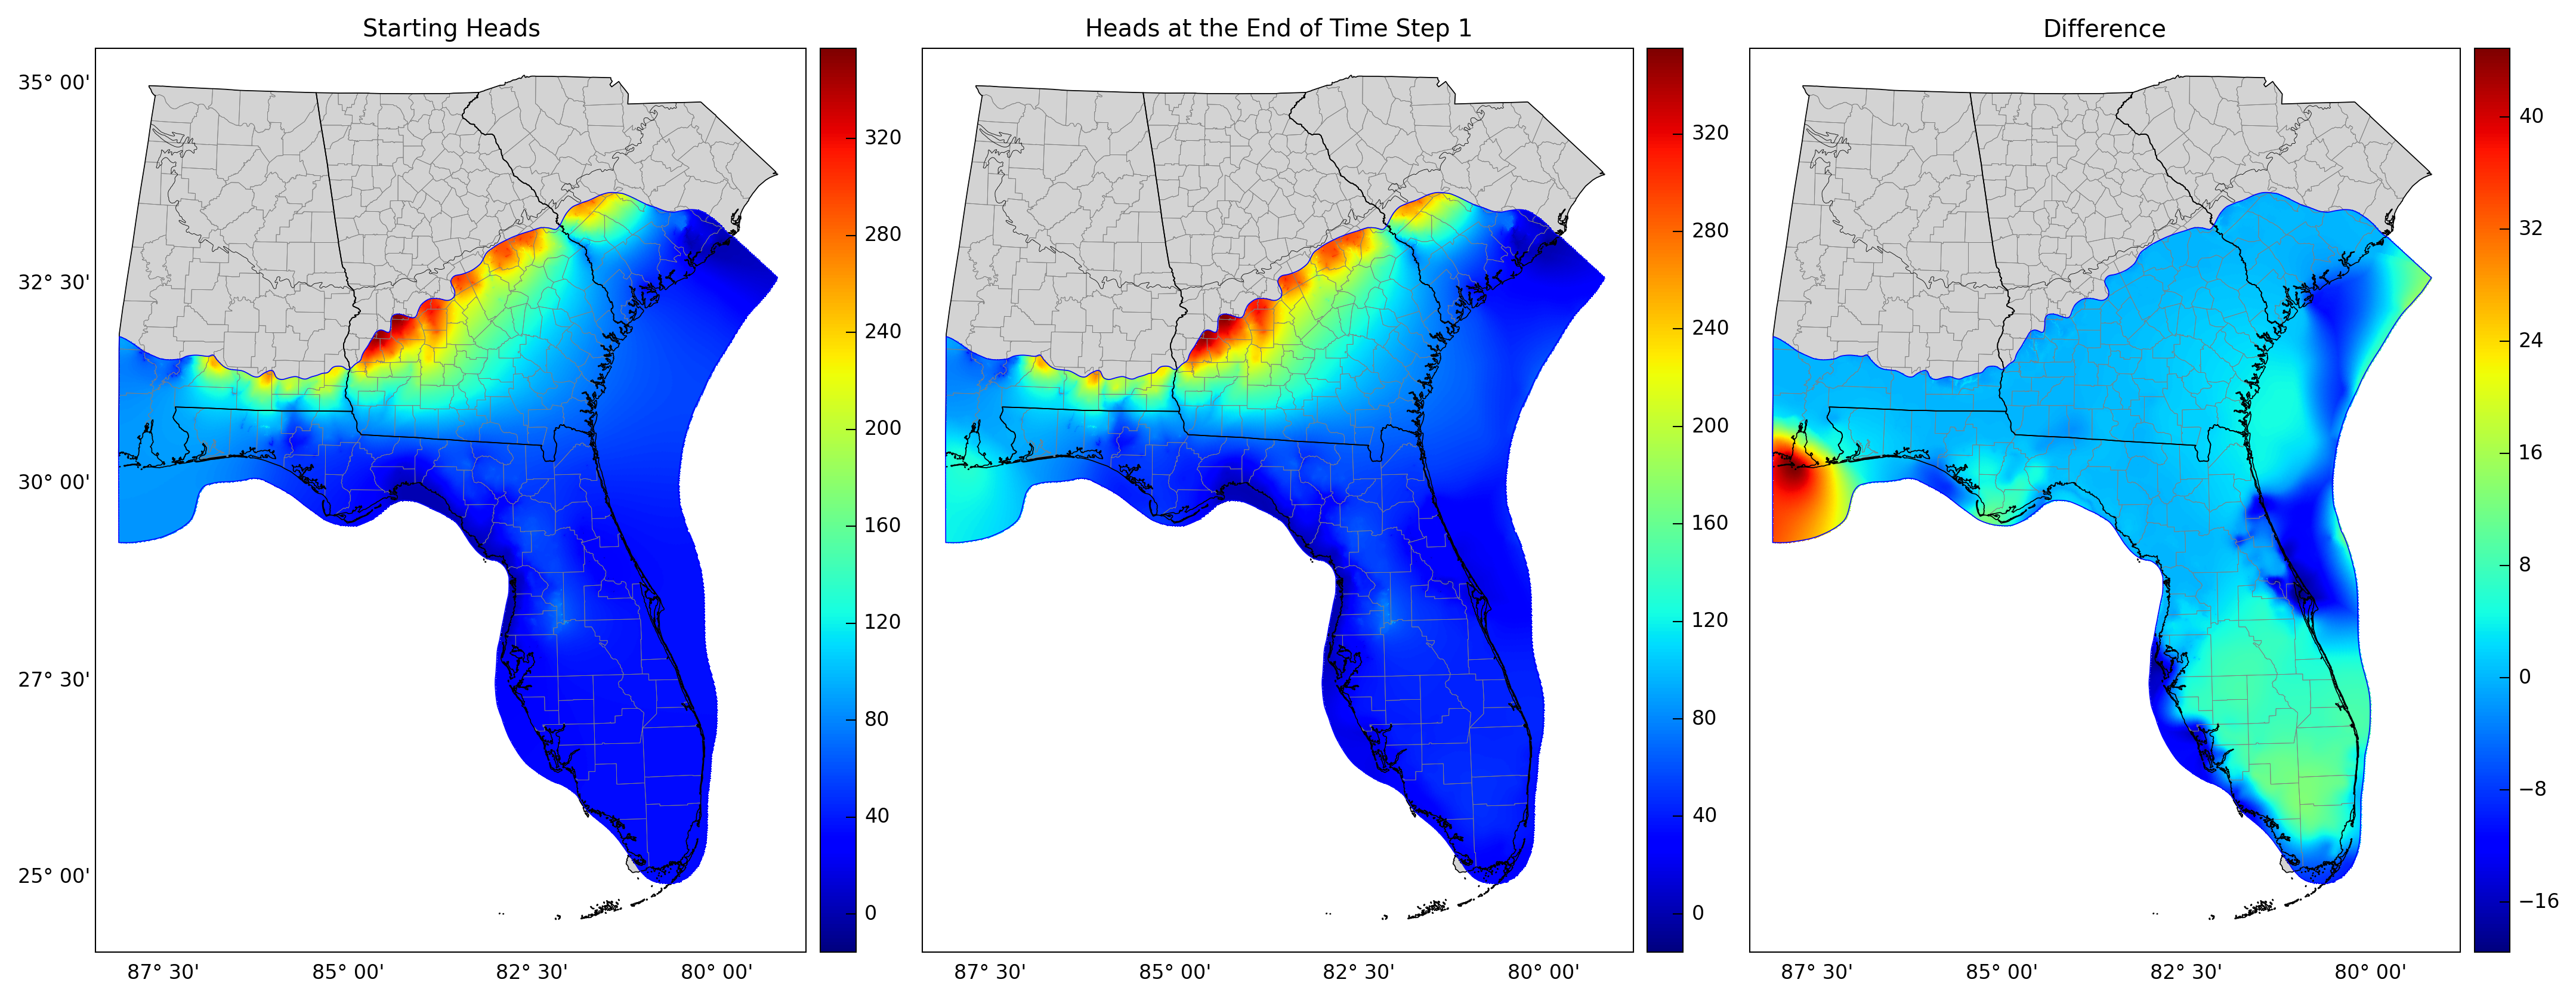

In [2]:
hdobj = HeadFile(os.path.join(modlepath, 'fas.hds'))
head = hdobj.get_data(kstpkper=(0, 0))
start = ml.bas6.strt.array
ibnd = ml.bas6.ibound.array
dif = head - start

head = np.ma.masked_where(ibnd==0, head)
start = np.ma.masked_where(ibnd==0, start)
dif = np.ma.masked_where(ibnd==0, dif)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 8), sharey=True)

ax1.set_title('Starting Heads')
bmap = ModelBaseMap(x_coords, y_coords, ax=ax1)
quadmesh = bmap.plot_array(start[2, :, :])
cbar = bmap.map.colorbar(quadmesh)

ax2.set_title('Heads at the End of Time Step 1')
bmap = ModelBaseMap(x_coords, y_coords, ax=ax2, draw_parallels=False)
quadmesh = bmap.plot_array(head[2, :, :])
cbar = bmap.map.colorbar(quadmesh)

ax3.set_title('Difference')
bmap = ModelBaseMap(x_coords, y_coords, ax=ax3, draw_parallels=False)
quadmesh = bmap.plot_array(dif[2, :, :])
cbar = bmap.map.colorbar(quadmesh)

plt.tight_layout()
plt.show()

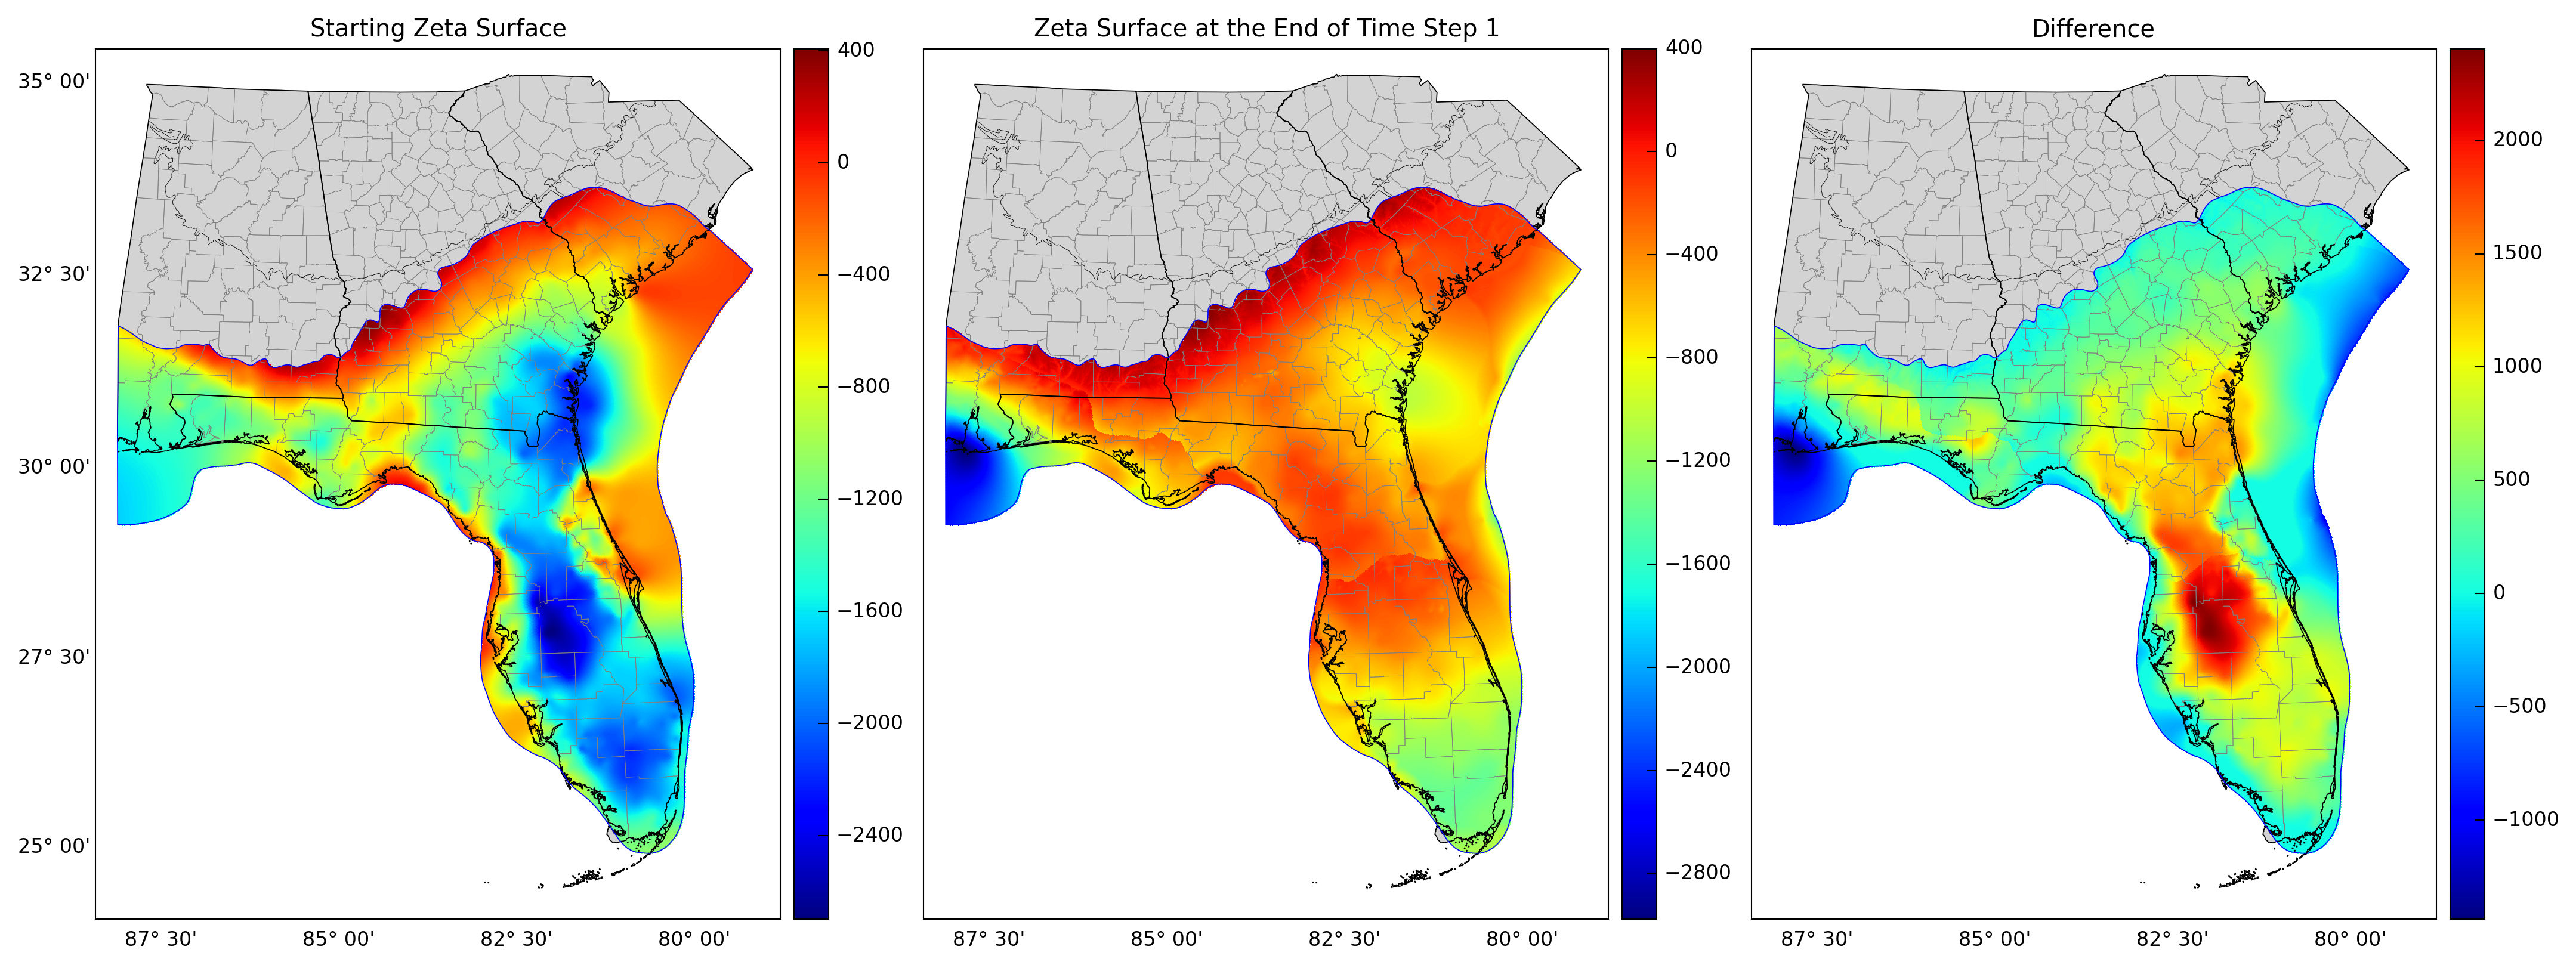

In [3]:
start_zta = np.array([np.loadtxt(os.path.join(modelpath, 'top_10ktds.ref'))]*9)
ztaobj = CellBudgetFile(os.path.join('..', '..', 'fas.zta'))
zta = ztaobj.get_data(kstpkper=(0, 0), text='ZETASRF  1')[0]
dif = zta-start_zta

zta = np.ma.masked_where(ibnd==0, zta)
start_zta = np.ma.masked_where(ibnd==0, start_zta)
dif = np.ma.masked_where(ibnd==0, dif)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 8), sharey=True)

ax1.set_title('Starting Zeta Surface')
bmap = ModelBaseMap(x_coords, y_coords, ax=ax1)
quadmesh = bmap.plot_array(start_zta[2, :, :])
cbar = bmap.map.colorbar(quadmesh)

ax2.set_title('Zeta Surface at the End of Time Step 1')
bmap = ModelBaseMap(x_coords, y_coords, ax=ax2, draw_parallels=False)
quadmesh = bmap.plot_array(zta[2, :, :])
cbar = bmap.map.colorbar(quadmesh)

ax3.set_title('Difference')
bmap = ModelBaseMap(x_coords, y_coords, ax=ax3, draw_parallels=False)
quadmesh = bmap.plot_array(dif[2, :, :])
cbar = bmap.map.colorbar(quadmesh)

plt.tight_layout()
plt.show()

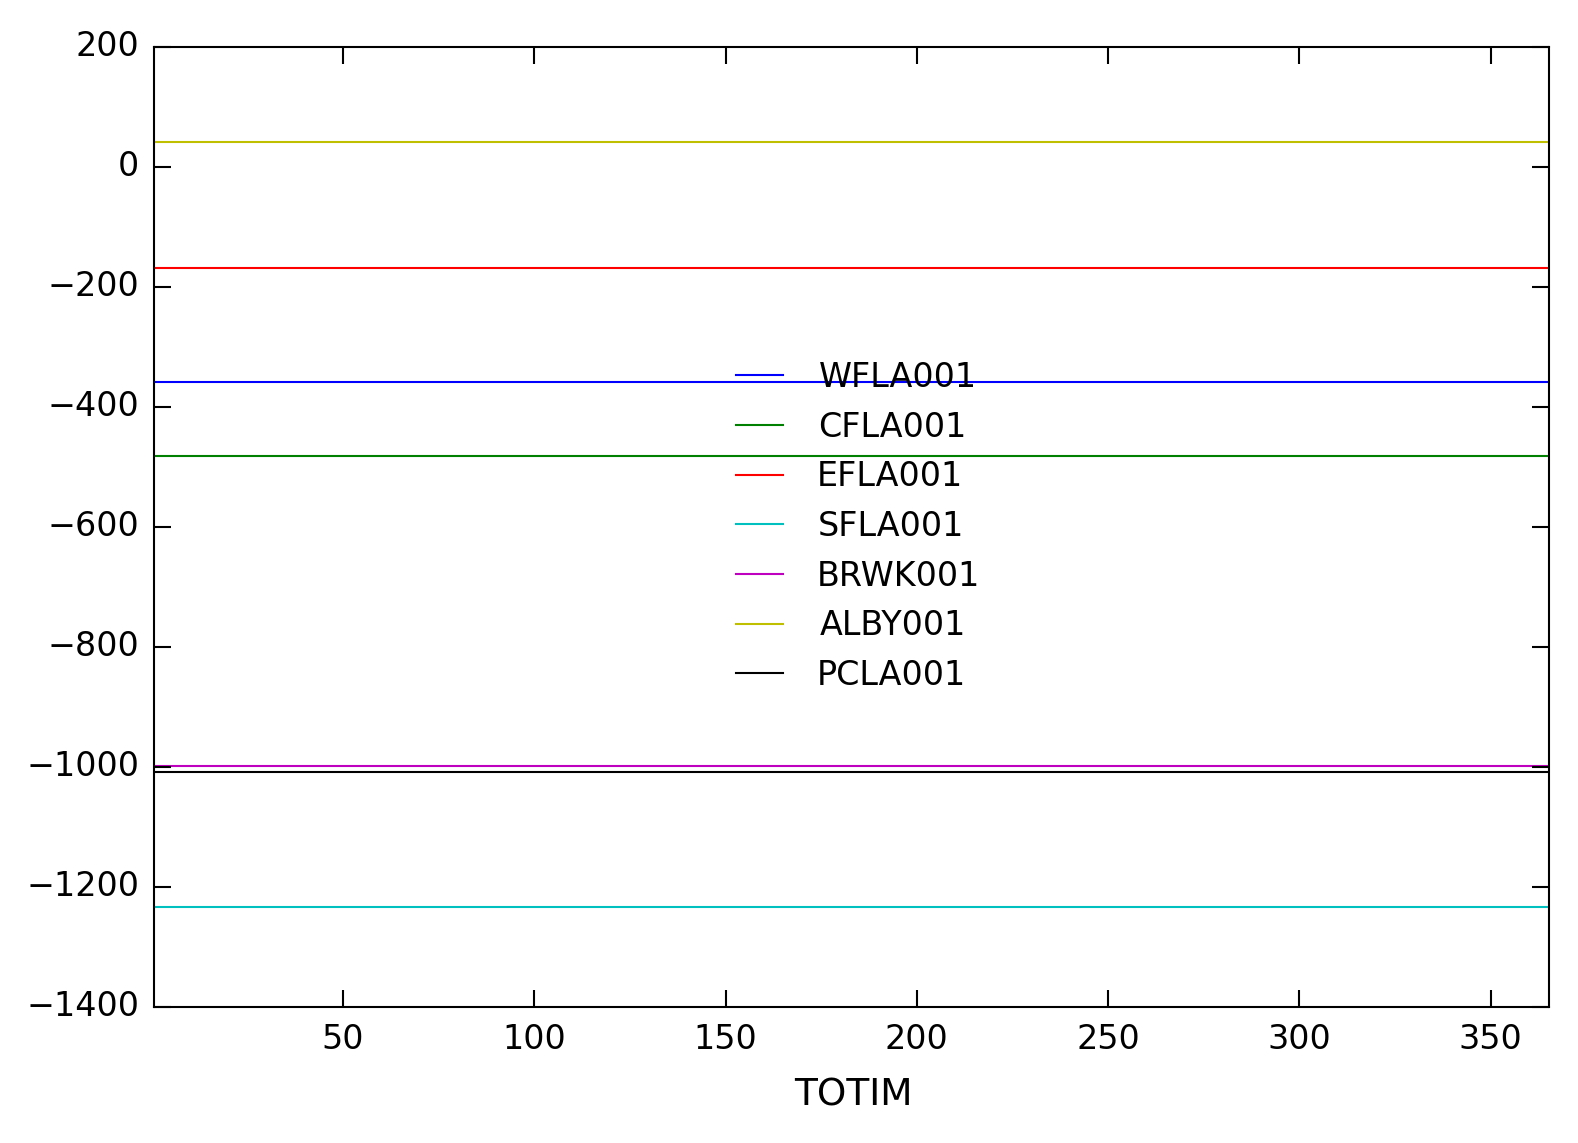

In [5]:
zobs = np.genfromtxt(os.path.join(modelpath, 'fas.zobs'), names=True)
zobs = pd.DataFrame.from_records(zobs, columns=zobs.dtype.names, index='TOTIM')
zobs.plot(kind='line')